In [8]:
import os
import numpy as np
from skimage import io, color, filters
import csv
import matplotlib.pyplot as plt
import cv2

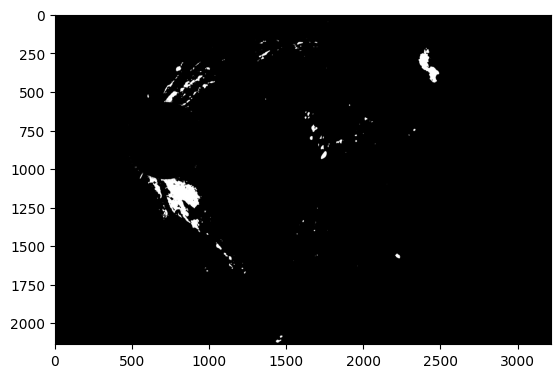

In [9]:
# Image path
img_path = "/Users/taiaburrahman/Desktop/git/RetinaSegmentation-HEx/Results/HardExodus/Tests/IDRiD_56.jpg"
# Save the features to a CSV file
csv_path = "/Users/taiaburrahman/Desktop/git/RetinaSegmentation-HEx/gabor1.csv"

img= cv2.imread(img_path)
plt.imshow(img)

In [5]:
# Define the parameters for the Gabor filter
freqs = [0.05, 0.1, 0.15]
theta = [0, np.pi/4, np.pi/2, 3*np.pi/4]

img = io.imread(img_path, as_gray=True)


# Extract the Gabor features
gabor_features = []
for freq in freqs:
    print(freq)
    for angle in theta:
        print(angle)
        filtered_img_real, filtered_img_imag = filters.gabor(img, frequency=freq, theta=angle)
        gabor_features.append(filtered_img_real.mean())
        gabor_features.append(filtered_img_imag.mean())

# If the CSV file does not exist, create it and write the header row
if not os.path.exists(csv_path):
    with open(csv_path, mode='w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(['image_name'] + [f'feature_{i}' for i in range(1, len(gabor_features) + 1)])

# Write the image name and Gabor features to the CSV file
with open(csv_path, mode='a', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow([os.path.basename(img_path)] + gabor_features)

0.05
0
0.7853981633974483
1.5707963267948966
2.356194490192345
0.1
0
0.7853981633974483
1.5707963267948966
2.356194490192345
0.15
0
0.7853981633974483
1.5707963267948966
2.356194490192345


In [10]:
import os
import numpy as np
from skimage import io, color, filters
import csv
import cv2

# Image path
img_path = "/var/www/unicas/RetinaSegmentation-HEx/Results/HardExodus/Trainning/"
# img_path = "/Users/taiaburrahman/Desktop/git/RetinaSegmentation-HEx/Results/HardExodus/Training/"

# Save the features to a CSV file
csv_path = "/var/www/unicas/RetinaSegmentation-HEx/Hardx_feature.csv"
# csv_path = "/Users/taiaburrahman/Desktop/git/RetinaSegmentation-HEx/Hardx_feature.csv"

imgList=os.listdir(img_path)

# Define the parameters for the Gabor filter
freqs = [0.05, 0.1, 0.15]
theta = [0, np.pi/4, np.pi/2, 3*np.pi/4]


label_len=0
hardx_features=[]
for imgName in imgList[-1]:
    img=cv2.imread(img_path+imgName, cv2.IMREAD_GRAYSCALE)
    # Extract the Gabor features
    gabor_features = []
    for freq in freqs:
        print(freq)
        for angle in theta:
            print(angle)
            filtered_img_real, filtered_img_imag = filters.gabor(img, frequency=freq, theta=angle)
            gabor_features.append(imgName)
            gabor_features.append(filtered_img_real.mean())
            gabor_features.append(filtered_img_imag.mean())
    label_len=gabor_features
    hardx_features.append(gabor_features)

print(label_len)
# If the CSV file does not exist, create it and write the header row
if not os.path.exists(csv_path):
    with open(csv_path, mode='w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(['image_name'] + [f"feature_{i}" for i in range(1, label_len+1) ])

# Write the image name and Gabor features to the CSV file
with open(csv_path, mode='a', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(hardx_features)


FileNotFoundError: [Errno 2] No such file or directory: '/var/www/unicas/RetinaSegmentation-HEx/Results/HardExodus/Trainning/'

In [ ]:
label_len=10
label_list=['image_name'] + [f"feature_{i}" for i in range(1, label_len+1)]
writer.writerow(['image_name'] + [f"feature_{i}" for i in range(1, label_len+1) ])
print(label_list)

['image_name', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10']


In [ ]:
import numpy as np
import cv2
im